## T03- Imbalanced data 

The dataset chosen is the well-known Credit Card Fraud , that consists in a set of anonymized credit card transations , that are either labeled as fradulent or genuine.

In fact, the dataset contains only numerical input variables which are the result of a PCA transformation. However, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. The 'Time' feature describes the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [29]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /home/andre/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [30]:
import pandas as pd

df = pd.read_csv(path + "/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Understanding the data

The first thing to be done is gather a basic sense of our data. As previosly stated, except for the transaction and amount we dont know what the other columns are (due to privacy reasons). Effectively, the description of the data says that all the features, except for time and amount,  went through a PCA transformation , that is, a Dimensionality Reduction technique, . It is imoportorder to implement a PCA transformation features need to be previously scaled. In this case, all the V features have been scaled (or, at least, it can be presumed that such operation was done).

In [31]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [32]:
df.isnull().sum().sum()

0

The dataset does not have any missing values , so , it doesn't need no imputation operations

In [33]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [34]:
df.drop_duplicates(inplace=True)

Firstly, it can be plotted the distribution of the exposed features (that is , both time and Amount):

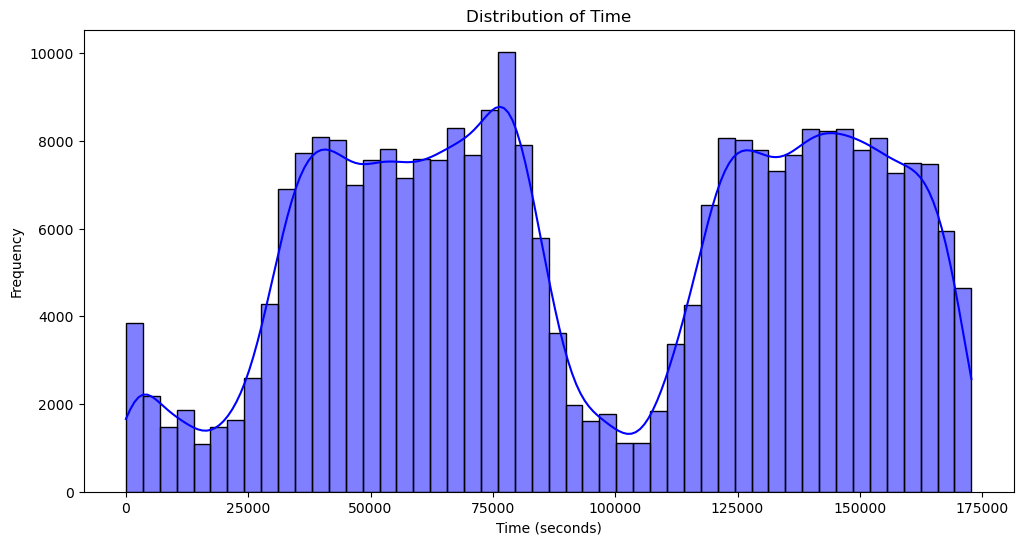

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of 'Time'
plt.figure(figsize=(12, 6))
sns.histplot(df['Time'], bins=50, kde=True, color='blue')
plt.title('Distribution of Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()



In [36]:
df['Time'].skew()

-0.03558064623598194

In [37]:
df['Time'].kurt()

-1.293432497044405

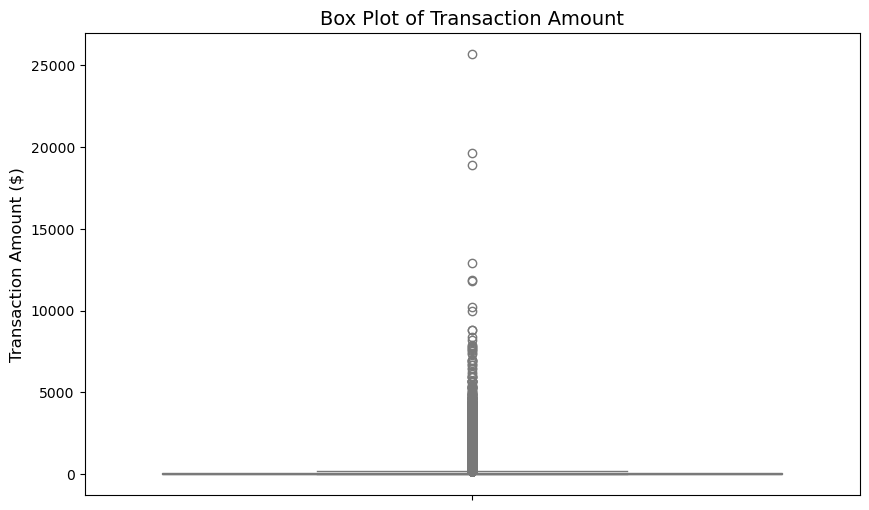

In [38]:
# Box plot of 'Amount' with rotated layout
plt.figure(figsize=(10, 6))  # Adjust figure size to match the rotated plot
sns.boxplot(y=df['Amount'], color='lightblue')  # Use 'y' instead of 'x'
plt.title('Box Plot of Transaction Amount', fontsize=14)
plt.ylabel('Transaction Amount ($)', fontsize=12)
plt.xlabel('')  # Remove x-axis label as it's unnecessary for the rotated view
plt.xticks(rotation=0)  # No rotation needed for x-axis ticks in this orientation
plt.yticks(rotation=0)  # Keep y-axis ticks horizontal
plt.show()

In [39]:
df['Amount'].skew()

16.978803370060476

In [40]:
df['Amount'].kurt()

844.471319490649

To perform a PCA. it is required to scale all of features that take part of such transformation. Despite of not knowing how the data was, the exposed features ( also the remaning ones to be scaled) should be scaled as well, as we are using later on a Logistic Regression Classifier, that requires the data to be scaled accordingly.

In [41]:

from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))





Next, as it was already expected that this dataset is , in fact, imbalanced, it is important to check the distribution of the target variable, that is, the 'Class' Variable:


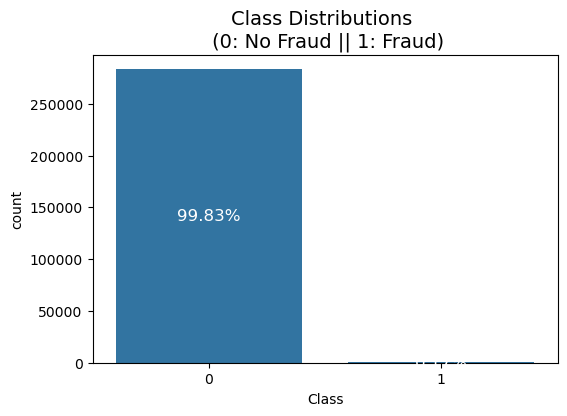

Class Distribution Percentages:
Class 0: 99.83328986416473%
Class 1: 0.1667101358352777%


In [42]:
plt.figure(figsize=(6, 4))

# Create the count plot
sns.countplot(x='Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# Calculate percentages
class_counts = df['Class'].value_counts()
total = len(df)
percentages = (class_counts / total) * 100

# Add percentages inside the bars
for i, count in enumerate(class_counts):
    percentage = percentages[i]
    plt.text(i, count / 2, f'{percentage:.2f}%', ha='center', va='center', color='white', fontsize=12)

plt.show()

# Print the percentages
print("Class Distribution Percentages:")
for label, percentage in percentages.items():
    print(f"Class {label}: {percentage}%")

## Measuring Performance Metrics

### Splitting Data into Training and Test Sets

In [43]:
from sklearn.model_selection import train_test_split


X_, y_ = df.drop(columns=['Class']), df['Class']
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3,stratify=y_, random_state=42)


# Check class distribution in the train set
train_class_distribution = y_train.value_counts(normalize=True) * 100
print("Class distribution in the training set (%):")
print(train_class_distribution)

# Check class distribution in the test set
test_class_distribution = y_test.value_counts(normalize=True) * 100
print("\nClass distribution in the test set (%):")
print(test_class_distribution)

Class distribution in the training set (%):
Class
0    99.83334
1     0.16666
Name: proportion, dtype: float64

Class distribution in the test set (%):
Class
0    99.833173
1     0.166827
Name: proportion, dtype: float64


The class distributions shows us that, in both test and training set, the original proportions of the target variable's classes are maintained, given that these are close to the Class distributions both in the training set as in the test set. So, it is safe to say that the split was well done. 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier

classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    #('SVM', SVC())
]


### **The meaning of the performance metrics**

In this context, each concept has a context-based meaning.

| **Term**            | **Definition**                                                                             |
|----------------------|-------------------------------------------------------------------------------------------|
| **True Positives**   | Correctly Classified Fraud Transactions                                                   |
| **False Positives**  | Incorrectly Classified Fraud Transactions                                                 |
| **True Negatives**   | Correctly Classified Non-Fraud Transactions                                               |
| **False Negatives**  | Incorrectly Classified Non-Fraud Transactions                                             |
| **Precision**        | True Positives text{True Positives} + {False Positives}            
| **Recall**           | \( \text{True Positives} / (\text{True Positives} + \text{False Negatives}) \)            |
| **Precision Meaning**| How precise is our model in detecting fraud transactions. That is, out of all the transactions the model flagged as fraud, the percentage of those who were actually fraud?                       |
| **Recall Meaning**   | The amount of fraud cases our model is able to detect. That is, out of all actual fraud cases, the percentage of those who were correctly identified?"  



#### **Precision-Recall Trade-off**

On the one hand, a model with a lower recall but an higher precision, is a model more selective. In fact, it is more likely to flag fewer transactions as fraud, which reduces false positives However, it may result in missing some actual fraud cases (increasing false negatives). In a real-world perspective, it would be more suitable for scenarios where incorrectly flagging legitimate transactions has significant consequences, such as customer dissatisfaction or financial loss due to declined transactions.
On the other hand , a model with an higher recall , and a lower precision, is a model more aggressive. That means that the model will be flagging more transactions as fraud, which can increase the likelihood of catching all fraud cases, but it also may flag more legitimate transactions (increasing false positives) wrongly. In a real-world example, such model is more suitable for scenarios where detecting fraud is critical, and false positives are less problematic.

#### **The importance of ROC_AUC measure**

The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) is a crucial metric for evaluating binary classification models, particularly in tasks like fraud detection. It measures the model's ability to distinguish between classes (e.g., fraud vs. non-fraud) by assessing how well it ranks predictions based on their probabilities. Unlike threshold-dependent metrics, ROC-AUC evaluates performance across all thresholds, making it a comprehensive and fair measure. It balances the tradeoff between true positives and false positives, providing insights into the model's discriminative power. ROC-AUC is particularly valuable in imbalanced datasets, as it focuses on ranking predictions rather than absolute counts, making it less biased than metrics like accuracy. A high ROC-AUC value indicates strong model performance, while a value near 0.5 suggests the model performs no better than random guessing. This metric is widely used for comparing models and ensuring the best one is chosen for critical applications like fraud detection.

### **Chossing the macro metric as the overall metric**

Macro metrics give equal importance to all classes by calculating metrics independently for each class and then taking their unweighted mean, regardless of class size. They are particularly useful when all classes are equally important or when dealing with imbalanced datasets. Macro metrics provide a clearer understanding of model performance across all classes, highlighting issues with minority class predictions, which is crucial in scenarios like fraud detection where misclassifying minority cases can have significant consequences.

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def model_results(classifiers, X_train, y_train, X_test, y_test):
    for name, classifier in classifiers:
        print(f"\n{'='*40}")
        print(f"Training and Evaluating: {name}")
        print(f"{'='*40}")
        
        # Train the classifier
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        
        # Compute overall metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision_macro = precision_score(y_test, y_pred, average='macro')
        recall_macro = recall_score(y_test, y_pred, average='macro')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        roc_auc = roc_auc_score(y_test, y_pred)
        
        # Display overall results
        print(f"\nOverall Metrics:")
        print(f"{'-'*40}")
        print(f"Accuracy              : {accuracy:.2f}")
        print(f"Precision (Macro)     : {precision_macro:.2f}")
        print(f"Recall (Macro)        : {recall_macro:.2f}")
        print(f"F1 Score (Macro)      : {f1_macro:.2f}")
        print(f"ROC-AUC               : {roc_auc:.2f}")
        print(f"{'='*40}\n")

In [46]:
model_results(classifiers, X_train, y_train, X_test, y_test)


Training and Evaluating: Decision Tree

Overall Metrics:
----------------------------------------
Accuracy              : 1.00
Precision (Macro)     : 0.87
Recall (Macro)        : 0.85
F1 Score (Macro)      : 0.86
ROC-AUC               : 0.85


Training and Evaluating: Logistic Regression

Overall Metrics:
----------------------------------------
Accuracy              : 1.00
Precision (Macro)     : 0.92
Recall (Macro)        : 0.78
F1 Score (Macro)      : 0.84
ROC-AUC               : 0.78


Training and Evaluating: KNN

Overall Metrics:
----------------------------------------
Accuracy              : 1.00
Precision (Macro)     : 0.97
Recall (Macro)        : 0.85
F1 Score (Macro)      : 0.90
ROC-AUC               : 0.85



## **Exploring Undersampling and Oversampling Approaches**

The [imbalanced-learn](https://imbalanced-learn.org/stable/index.html) toolbox offers a variety of implementations that corresponds to balancing techiques. In order to employ them in a more legible way, a set of wrapper functions were defined, each one corresponding to a sampling approach.

In [47]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SMOTEN
from imblearn.combine import SMOTEENN, SMOTETomek

In [48]:
def random_undersampling(X, y):
    """Undersamples the training data (X) according to RUS."""
    generator = RandomUnderSampler(random_state=42)
    X_res, y_res = generator.fit_resample(X, y)
    return X_res, y_res


def random_oversampling(X, y):
    """Oversamples the training data (X) according to ROS."""
    generator = RandomOverSampler(random_state=42)
    X_res, y_res = generator.fit_resample(X, y)
    return X_res, y_res


def smote_oversampling(X, y):
    """Applies the SMOTE technique on the training data (X)."""
    generator = SMOTE(random_state=42)
    X_res, y_res = generator.fit_resample(X, y)
    return X_res, y_res
def smote_n(X, y):
    """Applies the SMOTEN technique on the training data (X)."""
    # Pass k_neighbors to the SMOTE object used within SMOTEN
    generator = SMOTEN(random_state=42)
    X_res, y_res = generator.fit_resample(X, y)
    return X_res, y_res
def smote_enn(X, y):
    """Applies the SMOTEENN technique on the training data (X)."""
    # Pass k_neighbors to the SMOTE object used within SMOTEENN
    generator = SMOTEENN(random_state=42)
    X_res, y_res = generator.fit_resample(X, y)
    return X_res, y_res

def smote_tomek(X, y):
    """Applies the SMOTETomek technique on the training data (X)."""
    # Pass k_neighbors to the SMOTE object used within SMOTETomek
    generator = SMOTETomek(random_state=42)
    X_res, y_res = generator.fit_resample(X, y)
    return X_res, y_res
def ADASYN_(X, y):
    """Applies the ADASYN technique on the training data (X)."""
    # Pass k_neighbors to the SMOTE object used within SMOTETomek
    generator = ADASYN(sampling_strategy='auto', random_state=42)
    X_res, y_res = generator.fit_resample(X, y)
    return X_res, y_res


### **3.1. Exploring Random Undersampling (RUS)**

In what follows, we will repeat the previous steps (fitting a classifier and evaluating performance) using different resampling techniques to tackle the class imbalance problem before model training. We start with **RandomUndersampling**, which randomly removes some of the majority class examples to achieve prevalence parity:

In [49]:
from collections import Counter

# Perform Random Undersampling
X_train_rus, y_train_rus = random_undersampling(X_train, y_train)

print("Shape of X_train: ", X_train.shape)
print("Distribution of original training data: ", Counter(y_train))

print("Shape of X_train_rus: ", X_train_rus.shape)
print("Distribution of undersampled training data: ", Counter(y_train_rus))

Shape of X_train:  (198608, 30)
Distribution of original training data:  Counter({0: 198277, 1: 331})
Shape of X_train_rus:  (662, 30)
Distribution of undersampled training data:  Counter({0: 331, 1: 331})


Since the original training set consisted of **378 minority class examples** and **226980 majority class examples**, RUS randomly removes some majority class examples to keep only **378 majority examples** as well. The undersampled dataset now comprises 300 examples with balanced class priors.

In [50]:
model_results(classifiers, X_train_rus, y_train_rus, X_test, y_test)


Training and Evaluating: Decision Tree

Overall Metrics:
----------------------------------------
Accuracy              : 0.91
Precision (Macro)     : 0.51
Recall (Macro)        : 0.90
F1 Score (Macro)      : 0.49
ROC-AUC               : 0.90


Training and Evaluating: Logistic Regression

Overall Metrics:
----------------------------------------
Accuracy              : 0.96
Precision (Macro)     : 0.52
Recall (Macro)        : 0.92
F1 Score (Macro)      : 0.52
ROC-AUC               : 0.92


Training and Evaluating: KNN

Overall Metrics:
----------------------------------------
Accuracy              : 0.98
Precision (Macro)     : 0.53
Recall (Macro)        : 0.91
F1 Score (Macro)      : 0.55
ROC-AUC               : 0.91



As already expected, given the disparity of the distribution of the target variable ( as previously seen before, 99.74% of the cases are classified as non-fraud), undersampling techniques will tend to erase the negative cases, witch results on a heavy information loss. In fact, the f1 scores of the class 1 reflects a under-performed model.

### **3.2. Exploring Random Oversampling (ROS)**

Rather than removing majority examples from the training, **Random Oversampling (ROS) inflates the minority class concepts** until the class priors are balanced. To that end, it randomly selects some minority class examples, creates exact replicas of these examples, and adds them to the training data.

In [51]:
# Perform Random Undersampling
X_train_ros, y_train_ros = random_oversampling(X_train, y_train)

print("Shape of X_train: ", X_train.shape)
print("Distribution of original training data: ", Counter(y_train))

print("Shape of X_train_rus: ", X_train_ros.shape)
print("Distribution of undersampled training data: ", Counter(y_train_ros))

Shape of X_train:  (198608, 30)
Distribution of original training data:  Counter({0: 198277, 1: 331})
Shape of X_train_rus:  (396554, 30)
Distribution of undersampled training data:  Counter({0: 198277, 1: 198277})


In [52]:
model_results(classifiers, X_train_ros, y_train_ros, X_test, y_test)


Training and Evaluating: Decision Tree

Overall Metrics:
----------------------------------------
Accuracy              : 1.00
Precision (Macro)     : 0.87
Recall (Macro)        : 0.85
F1 Score (Macro)      : 0.86
ROC-AUC               : 0.85


Training and Evaluating: Logistic Regression

Overall Metrics:
----------------------------------------
Accuracy              : 0.97
Precision (Macro)     : 0.53
Recall (Macro)        : 0.93
F1 Score (Macro)      : 0.54
ROC-AUC               : 0.93


Training and Evaluating: KNN

Overall Metrics:
----------------------------------------
Accuracy              : 1.00
Precision (Macro)     : 0.84
Recall (Macro)        : 0.90
F1 Score (Macro)      : 0.87
ROC-AUC               : 0.90



### **Exploring Synthetic Minority Oversampling Technique (SMOTE)**



Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.
The new instances are not just copies of existing minority cases. Instead, the algorithm takes samples of the feature space for each target class and its nearest neighbors. The algorithm then generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general.

In [53]:
# Applying SMOTE
X_train_smote, y_train_smote = smote_oversampling(X_train, y_train)

print("Shape of X_train: ", X_train.shape)
print("Distribution of original training data: ", Counter(y_train))

print("Shape of X_train_smote: ", X_train_smote.shape)
print("Distribution of oversampled training data: ", Counter(y_train_smote))

model_results(classifiers, X_train_smote, y_train_smote, X_test, y_test)

Shape of X_train:  (198608, 30)
Distribution of original training data:  Counter({0: 198277, 1: 331})
Shape of X_train_smote:  (396554, 30)
Distribution of oversampled training data:  Counter({0: 198277, 1: 198277})

Training and Evaluating: Decision Tree

Overall Metrics:
----------------------------------------
Accuracy              : 1.00
Precision (Macro)     : 0.68
Recall (Macro)        : 0.86
F1 Score (Macro)      : 0.74
ROC-AUC               : 0.86


Training and Evaluating: Logistic Regression

Overall Metrics:
----------------------------------------
Accuracy              : 0.97
Precision (Macro)     : 0.53
Recall (Macro)        : 0.93
F1 Score (Macro)      : 0.54
ROC-AUC               : 0.93


Training and Evaluating: KNN

Overall Metrics:
----------------------------------------
Accuracy              : 1.00
Precision (Macro)     : 0.72
Recall (Macro)        : 0.90
F1 Score (Macro)      : 0.78
ROC-AUC               : 0.90



#### SMOTE Variants

#### Adaptive Synthetic Sampling (ADASYN)

ADASYN works by generating synthetic samples for minority classes based on the feature space of the original dataset. It calculates the density distribution of each minority class sample and generates synthetic samples according to the density distribution. This adaptive approach ensures that more synthetic samples are generated for minority class samples that are harder to learn, thus improving the classification performance of machine learning models.

In [54]:
X_train_smote_adasyn, y_train_smote_adasyn = ADASYN_(X_train, y_train)

print("Shape of X_train: ", X_train.shape)
print("Distribution of original training data: ", Counter(y_train))

print("Shape of X_train_smote_adasyn: ", X_train_smote_adasyn.shape)
print("Distribution of oversampled training data: ", Counter(y_train_smote_adasyn))

model_results(classifiers, X_train_smote_adasyn, y_train_smote_adasyn, X_test, y_test)

Shape of X_train:  (198608, 30)
Distribution of original training data:  Counter({0: 198277, 1: 331})
Shape of X_train_smote_adasyn:  (396552, 30)
Distribution of oversampled training data:  Counter({0: 198277, 1: 198275})

Training and Evaluating: Decision Tree

Overall Metrics:
----------------------------------------
Accuracy              : 1.00
Precision (Macro)     : 0.71
Recall (Macro)        : 0.85
F1 Score (Macro)      : 0.76
ROC-AUC               : 0.85


Training and Evaluating: Logistic Regression

Overall Metrics:
----------------------------------------
Accuracy              : 0.92
Precision (Macro)     : 0.51
Recall (Macro)        : 0.91
F1 Score (Macro)      : 0.50
ROC-AUC               : 0.91


Training and Evaluating: KNN

Overall Metrics:
----------------------------------------
Accuracy              : 1.00
Precision (Macro)     : 0.72
Recall (Macro)        : 0.90
F1 Score (Macro)      : 0.78
ROC-AUC               : 0.90



#### **SMOTEN (Synthetic Minority Over-sampling Technique for Nominal and Continuous)** 

SMOTEN is an extension of the SMOTE algorithm designed to handle datasets with both categorical (nominal) and continuous features. Unlike traditional SMOTE, which works only with continuous data, SMOTEN generates synthetic minority class samples by preserving the integrity of categorical features while interpolating continuous features. This makes it an effective solution for balancing imbalanced datasets with mixed feature types, helping improve model performance by creating more realistic synthetic samples.

In [ ]:
X_train_smote_n, y_train_smote_n = smote_n(X_train, y_train)

print("Shape of X_train: ", X_train.shape)
print("Distribution of original training data: ", Counter(y_train))

print("Shape of X_train_smote_n: ", X_train_smote_n.shape)
print("Distribution of oversampled training data: ", Counter(y_train_smote_n))

model_results(classifiers, X_train_smote_n, y_train_smote_n, X_test, y_test)

#### **SMOTE SVM**

SMOTE SVM is a combination of the SMOTE (Synthetic Minority Over-sampling Technique) and Support Vector Machine (SVM) algorithms aimed at improving the performance of classification models on imbalanced datasets. SMOTE generates synthetic samples to balance the dataset, specifically for the minority class, while SVM is used as the classifier.
SMOTE is used to generate synthetic data points for the minority class, creating a more balanced dataset. Yet, SVM is then applied to this balanced dataset, where the model is trained to better distinguish between the minority and majority classes, leading to improved classification performance, especially for the minority class.
In summary, SMOTE SVM combines the strengths of synthetic over-sampling with SVM to address class imbalance and enhance the classifier's ability to detect minority class instances.

### **Combination of Over and under-sampling methods**

The imblearn.combine provides methods which combine over-sampling and under-sampling. In the imblearn.combine module, SMOTEEN and SMOTE Tomek are two advanced hybrid techniques that combine oversampling and undersampling to address imbalanced datasets effectively.

#### **SMOTEEN** 

This method starts with SMOTE for oversampling the minority class.
After oversampling, it uses the Edited Nearest Neighbors (ENN) method for undersampling. ENN removes samples whose class label differs from the majority of their nearest neighbors, effectively cleaning noisy or ambiguous samples.
SMOTEEN is particularly useful for addressing datasets with overlapping class distributions and significant noise, as it emphasizes dataset refinement after oversampling.

In [55]:
X_train_smote_enn, y_train_smote_enn = smote_enn(X_train, y_train)

print("Shape of X_train: ", X_train.shape)
print("Distribution of original training data: ", Counter(y_train))

print("Shape of X_train_smote_enn: ", X_train_smote_enn.shape)
print("Distribution of oversampled training data: ", Counter(y_train_smote_enn))

model_results(classifiers, X_train_smote_enn, y_train_smote_enn, X_test, y_test)

Shape of X_train:  (198608, 30)
Distribution of original training data:  Counter({0: 198277, 1: 331})
Shape of X_train_smote_enn:  (396234, 30)
Distribution of oversampled training data:  Counter({1: 198277, 0: 197957})

Training and Evaluating: Decision Tree

Overall Metrics:
----------------------------------------
Accuracy              : 1.00
Precision (Macro)     : 0.68
Recall (Macro)        : 0.87
F1 Score (Macro)      : 0.74
ROC-AUC               : 0.87


Training and Evaluating: Logistic Regression

Overall Metrics:
----------------------------------------
Accuracy              : 0.97
Precision (Macro)     : 0.52
Recall (Macro)        : 0.93
F1 Score (Macro)      : 0.54
ROC-AUC               : 0.93


Training and Evaluating: KNN

Overall Metrics:
----------------------------------------
Accuracy              : 1.00
Precision (Macro)     : 0.70
Recall (Macro)        : 0.91
F1 Score (Macro)      : 0.76
ROC-AUC               : 0.91



#### **SMOTE-Tomek**

In a similar manner as SMOTEEN, this method first applies Synthetic Minority Oversampling Technique (SMOTE) to create synthetic samples for the minority class, thus increasing its representation in the dataset.
After oversampling, it applies the Tomek Links undersampling technique to clean the dataset. Tomek Links identify pairs of samples from different classes that are nearest neighbors. Removing such links eliminates borderline or noisy examples that might hinder the classifier's performance.
The combination of SMOTE and Tomek Links ensures the dataset is balanced while also reducing overlap between classes, leading to improved class separation.

In [56]:
X_train_smote_tomek, y_train_smote_tomek = smote_tomek(X_train, y_train)

print("Shape of X_train: ", X_train.shape)
print("Distribution of original training data: ", Counter(y_train))

print("Shape of X_train_smote_tomek: ", X_train_smote_tomek.shape)
print("Distribution of oversampled training data: ", Counter(y_train_smote_tomek))

model_results(classifiers, X_train_smote_tomek, y_train_smote_tomek, X_test, y_test)

Shape of X_train:  (198608, 30)
Distribution of original training data:  Counter({0: 198277, 1: 331})
Shape of X_train_smote_tomek:  (396554, 30)
Distribution of oversampled training data:  Counter({0: 198277, 1: 198277})

Training and Evaluating: Decision Tree

Overall Metrics:
----------------------------------------
Accuracy              : 1.00
Precision (Macro)     : 0.69
Recall (Macro)        : 0.86
F1 Score (Macro)      : 0.75
ROC-AUC               : 0.86


Training and Evaluating: Logistic Regression

Overall Metrics:
----------------------------------------
Accuracy              : 0.97
Precision (Macro)     : 0.53
Recall (Macro)        : 0.93
F1 Score (Macro)      : 0.54
ROC-AUC               : 0.93


Training and Evaluating: KNN

Overall Metrics:
----------------------------------------
Accuracy              : 1.00
Precision (Macro)     : 0.72
Recall (Macro)        : 0.90
F1 Score (Macro)      : 0.78
ROC-AUC               : 0.90

